# Part I - Ford GoBike System Data
## by Agyo Jephthah Job

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset was for 2019, Feb.


## Preliminary Wrangling


In [55]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading in the dataset and describing its properties through the questions below.


In [56]:
# Loading my dataset
df = pd.read_csv('tripdata.csv')

In [57]:
# View some sample of the data set

df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
106118,424,2019-02-13 18:54:01.1850,2019-02-13 19:01:05.9860,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,6308,Subscriber,NaN,NaN,No
64348,1003,2019-02-20 12:08:32.6670,2019-02-20 12:25:16.1830,81.0,Berry St at 4th St,37.775880,-122.393170,58.0,Market St at 10th St,37.776619,-122.417385,5282,Subscriber,1993.0,Male,No
182842,228,2019-02-01 07:47:19.1270,2019-02-01 07:51:07.6390,126.0,Esprit Park,37.761634,-122.390648,116.0,Mississippi St at 17th St,37.764802,-122.394771,1975,Subscriber,1989.0,Male,No
36044,303,2019-02-23 17:11:05.0410,2019-02-23 17:16:08.6610,182.0,19th Street BART Station,37.809013,-122.268247,164.0,Isabella St at San Pablo Ave,37.814988,-122.274844,4916,Subscriber,1996.0,Female,No
10330,264,2019-02-27 20:52:13.1280,2019-02-27 20:56:38.0270,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,60.0,8th St at Ringold St,37.774520,-122.409449,6246,Subscriber,1989.0,Male,No


In [58]:
# Performing initial investigation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 17.5+ MB


In [59]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [60]:
df.duplicated().sum()

0

In [61]:
# Unique values for each variable
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [62]:
# Make a copy of the dataset
df_copy = df.copy()

## Issues Discovered
> - start_time and end_time have the wrong data type (onject)
> - start_station_id and end_station_id are stored as float64
> - There are many missing values (especially in member_birth_year and member_gender)

## Fixing issues

In [63]:
# Changing Start and end time data type
df[['start_time', 'end_time']]= df[['start_time', 'end_time']].astype('datetime64[ns]')

In [64]:
# Checking start and end data type
df[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
start_time    183412 non-null datetime64[ns]
end_time      183412 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.8 MB


In [65]:
# Changing start_station_id and end_station_id data type to int to remove the decimal points
df[['start_station_id', 'end_station_id']] = df[['start_station_id', 'end_station_id']].astype('object')

In [66]:
# Checking to see the changes
df[['start_station_id', 'end_station_id']].sample(5)

,start_station_id,end_station_id
6481,253,245
127416,355,355
181540,137,36
43655,343,22
81481,127,119


###### Dealing with missing values

In [67]:
# getting value types for the gender
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [68]:
# Dropping all rows with NA value.
# I will like to perform some analysis using the gender, since out of 183412 rows only 8265 rows are NA, to me its reasonable to drop them.
# There are 197 NA too for start and end station id and name. They will be droped too, to avoid inaccurate analysis in the future.
df.dropna(axis=0, inplace=True)

In [69]:
# Check for NA values
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [70]:
# New shape of the dataframe
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(5), int64(2), object(7)
memory usag

(174952, 16)

In [71]:
# descriptive statistics for numeric variables
print(df.describe())

        duration_sec  start_station_latitude  start_station_longitude  \
count  174952.000000           174952.000000            174952.000000   
mean      704.002744               37.771220              -122.351760   
std      1642.204905                0.100391                 0.117732   
min        61.000000               37.317298              -122.453704   
25%       323.000000               37.770407              -122.411901   
50%       510.000000               37.780760              -122.398279   
75%       789.000000               37.797320              -122.283093   
max     84548.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude        bike_id  \
count         174952.000000          174952.000000  174952.000000   
mean              37.771414            -122.351335    4482.587555   
std                0.100295               0.117294    1659.195937   
min               37.317298            -122.453704      11.000000 

In [72]:
# View the most pupolar start hour and end hour in each month
df['start_time'].dt.month.value_counts() 

#The dataset is just for the month of febuary

2    174952
Name: start_time, dtype: int64

### What is the structure of your dataset?

> Initially there was 183412 rows in the dataset, but after some data cleaning, there is now 174952 rows and 16 columns. These variables have data types int, float, objects or datetime64[ns]
> The dataset only contains data from 2019, Feb.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding out if the gender and age of the users influence the duration of the rides.
> - Which gender have longer ride duration
> - What is the age bracket of those with longer or shorter duration, etc

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features in the dataset that will support my ivestigation are the gender of the users, age of the users and the duration of their rides. Also, the user type will help.

## Univariate Exploration

> In this section, I will be investigating the distributions of individual variables.


>  **How many genders are represented in the dataset and what are their proportions?**

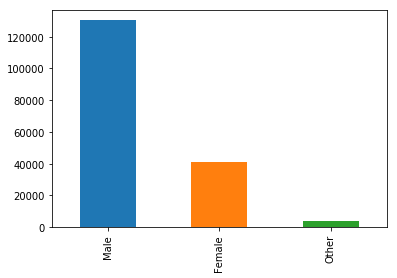

In [73]:
# What are the percentages based on gender
df['member_gender'].value_counts().plot(kind='bar');

In [74]:
# Its kinda difficult to figure out the value of each gender.
# Plotting the bar chart to show their relative values instead.
total_df = df.shape[0]
max_g = df['member_gender'].value_counts()[0] / total_df
print(max_g)

0.7459188806072523


In [75]:
#tick_prop = np.arange(0, max_g, 0.04)
#tick_names = ['{:0.2f}'.format(v) for v in tick_prop]

In [76]:
color_ = sb.color_palette()[0]
order_ = df['member_gender'].value_counts().index
orders = df['member_gender'].value_counts()

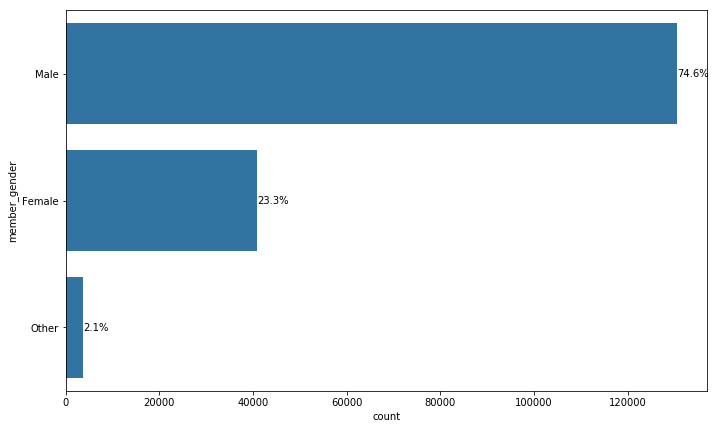

In [77]:
plt.figure(figsize = (11.5,7))
sb.countplot(data = df, y = 'member_gender', color = color_, order = order_);

for i in range(orders.shape[0]):
    count = orders[i]
    p_srt = '{:0.1f}%'.format(100*count/total_df)
    plt.text(count + 1, i, p_srt, va ='center');

##### Findings

> - There 3 genders represented, male, female and other.
> - The male gender has the higest proportion with about 75%, followed by female with 23%, and Other with 2 %

> **How many user type are there, and what are their %?**

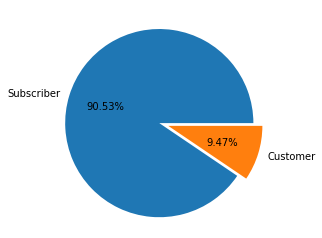

In [78]:
# What is the proportion of the User types
c = df['user_type'].value_counts()
plt.pie(c, labels = c.index, explode= [0,0.1], autopct= '%1.2f%%');
plt.axis('square');

###### Findings
> - There 2 user types... Customers and Subscribers
> - 90.5% of individuals in the dataset are Subscribers, while
> - 9.5% are Customers

> **What is the age distributions for all the genders?**

In [79]:
# Distribution of age
# There is no age column, I'll create a new column that contains the ages of the bikers

In [80]:
df['start_time'].dt.year.value_counts()

# The data was collected in 2019

2019    174952
Name: start_time, dtype: int64

In [81]:
# Use 2019 to calculate the age.
base_date = df['start_time'].dt.year.max()

df['age'] = base_date - df['member_birth_year']

In [82]:
# Convert the data type from float to int
df[['member_birth_year', 'age']] = df[['member_birth_year', 'age']].astype('int')

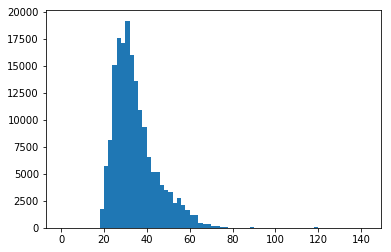

In [83]:
# Plotting a general hist. for the ages
bins = np.arange(0, df['age'].max()+2, 2)
plt.hist(data = df, x = 'age', bins = bins);

###### Findings

> - Most of the users fall between the age range of 25 - 45
> - There few outliers, ages that falls between 85 and above

In [84]:
# Max age
df['age'].max()

141

> **What of the age distribution for individual gender type?**

In [85]:
# Seperating the dataset to contain only a specific gender
female = df.query('member_gender == "Female"')
male = df.query('member_gender == "Male"')
others = df.query('member_gender == "Other"')

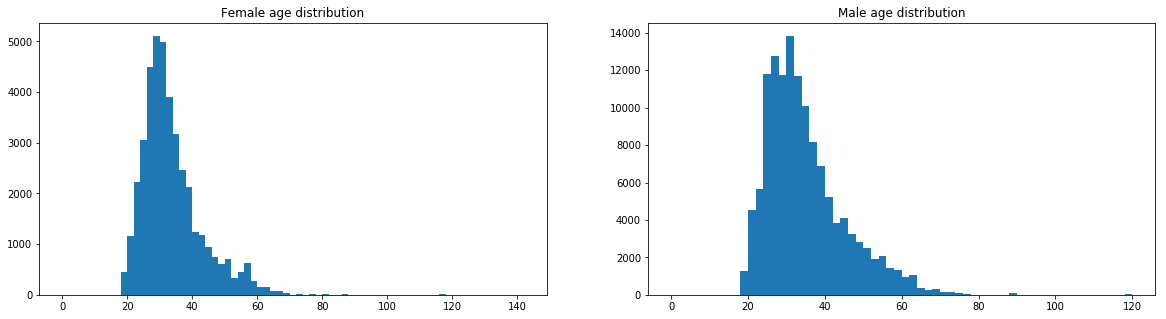

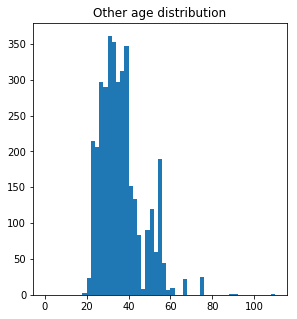

In [86]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1) 
bins = np.arange(0, female['age'].max()+2, 2)
plt.hist(data = female, x = 'age', bins = bins);
plt.title('Female age distribution')


plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, male['age'].max()+2, 2)
plt.hist(data = male, x = 'age', bins = bins);
plt.title('Male age distribution')

plt.figure(figsize = [10, 5])

plt.subplot(1,2,1)
bins = np.arange(0, others['age'].max()+2, 2)
plt.hist(data = others, x = 'age', bins = bins);
plt.title('Other age distribution');


###### Findings
> - Users age falls between (17 - 18) and (85 - 90)
> - There are few outliers, ages above 90
> - Most the bikers have age range of 25 - 45 (for all genders)
> - The male gender has more users with ages that are above 45 compared to the rest of the genders.

In [87]:
# outliers present, ages above 90
df[df['age'] >= 90]['age'].count()

77

> **What hour of the day is the most popular for bikers?**

In [88]:
def hours(c):
    '''
    This function takes a timestamp column and extract just the Hour
    and converts the hours in 24h format to 12h format.
    Returns a list of the converted hours...
    ''' 
    #Create an empty list to hold the new time
    d = []
    e = [] # for time with either am or pm (trial)...

    # Loop through list to convert time and append to new list
    for i in c:
        a = i - 12
        if a <= 0:
            d.append(i)
            e.append(str(i)+"am")
        else:
            d.append(a)
            e.append(str(a)+"pm")
    return d, e

# create a variable holding the time columns
start_time = df['start_time'].dt.hour
end_time = df['end_time'].dt.hour

# Create new columns
df['initial_stime'] = hours(start_time)[0]
df['start_hour'] = hours(start_time)[1]

df['initial_etime'] = hours(end_time)[0]
df['end_hour'] = hours(end_time)[1]

In [89]:
start_df = df[['duration_sec', 'member_gender', 'age', 'initial_stime', 'start_hour', 'user_type']]
start_df.head()

,duration_sec,member_gender,age,initial_stime,start_hour,user_type
0,52185,Male,35,5,5pm,Customer
2,61854,Male,47,12,12am,Customer
3,36490,Other,30,5,5pm,Subscriber
4,1585,Male,45,11,11pm,Subscriber
5,1793,Male,60,11,11pm,Subscriber


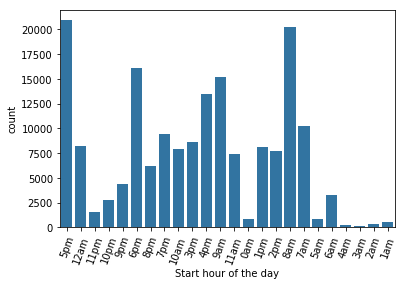

In [90]:
order_start = start_df['start_hour'].value_counts().index
prop = start_df['start_hour'].value_counts()
sb.countplot(data = start_df, x = 'start_hour', color = color_)
plt.xticks(rotation = 70)
plt.xlabel('Start hour of the day');


In [91]:
end_df = df[['duration_sec', 'member_gender', 'age', 'initial_etime', 'end_hour', 'user_type']]
end_df.head()

,duration_sec,member_gender,age,initial_etime,end_hour,user_type
0,52185,Male,35,8,8am,Customer
2,61854,Male,47,5,5am,Customer
3,36490,Other,30,4,4am,Subscriber
4,1585,Male,45,0,0am,Subscriber
5,1793,Male,60,0,0am,Subscriber


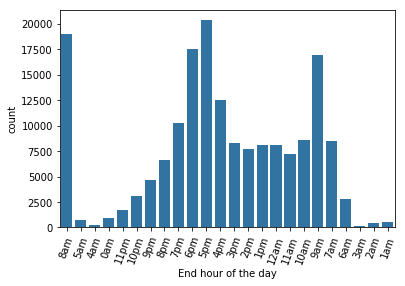

In [92]:
order_end = end_df['end_hour'].value_counts().index
sb.countplot(data = end_df, x = 'end_hour', color = color_)
plt.xticks(rotation = 70)
plt.xlabel('End hour of the day');

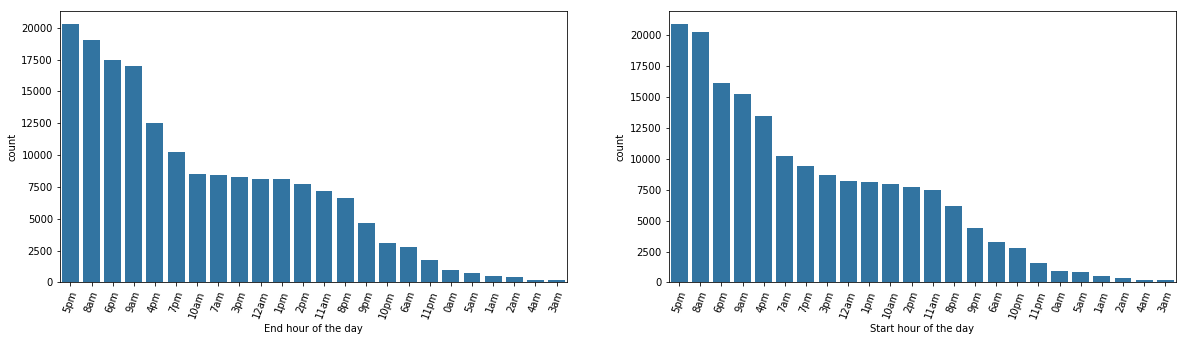

In [93]:
# Having same plots as the above, but now ordered for easy comparison
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1) 
order_end = end_df['end_hour'].value_counts().index
sb.countplot(data = end_df, x = 'end_hour', color = color_, order = order_end)
plt.xticks(rotation = 70)
plt.xlabel('End hour of the day');

plt.subplot(1, 2, 2)
order_start = start_df['start_hour'].value_counts().index
prop = start_df['start_hour'].value_counts()
sb.countplot(data = start_df, x = 'start_hour', color = color_, order = order_start)
plt.xticks(rotation = 70)
plt.xlabel('Start hour of the day');

> - The most common start and end hour of a day is 5pm.

In [94]:
# New shape
df.shape

(174952, 21)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Performed some data analysis on the variables of interest to me, this is how the variables are distributed:
> - At the start, after doing some data cleaning, I have 174952 rows and 16 columns
> - Users are categorised into Subscribers and Customers
> - Male representing about 75% of the users, Female 23%, and Other 2%.

> Most of the users fall between the ages of 25 - 45, with few less than 25 or above 45. Compared to the rest of the genders, there are most male users above 45 years.

> The most common start and end hour of a day by these users is 5pm.

> The unusual points I noticed is the age of the users, some users have ages above 90. The higest is 141 years (Don't know if someone at that age can still ride a bike).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The features I investigated shows that there are way more men than women, aside from this I have not noticed any unsual distribution.

> Performed some operations on the data to tidy the data like droppinf na values, changing data types, and also changed the form of the start and end  time (Created 4 new columns to hold this values) to get the hours in the time.

> The new shape of the data is now 174952 rows and 21 columns.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

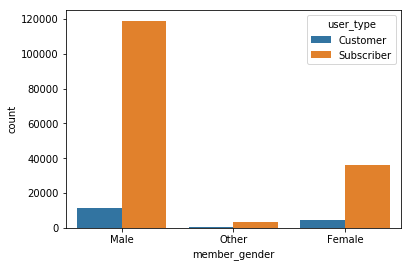

In [95]:
# What is the proportion of the User types by gender
sb.countplot(data = df, x = 'member_gender', hue = 'user_type');

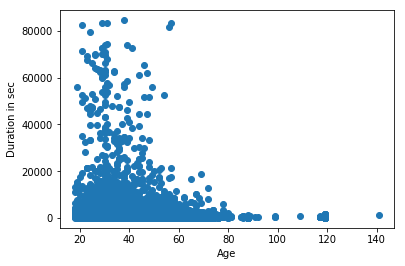

In [96]:
# Scatter plot
plt.scatter(data = df, y = 'duration_sec', x = 'age');
plt.ylabel('Duration in sec')
plt.xlabel('Age');

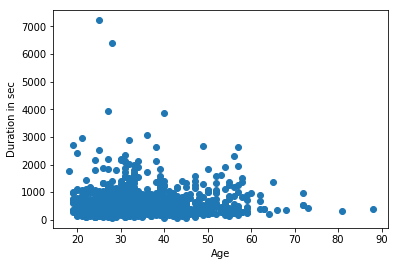

In [97]:
# Overplotting, take sample
sample1 = df.sample(1000)

plt.scatter(data = sample1, y = 'duration_sec', x = 'age');
plt.ylabel('Duration in sec')
plt.xlabel('Age');

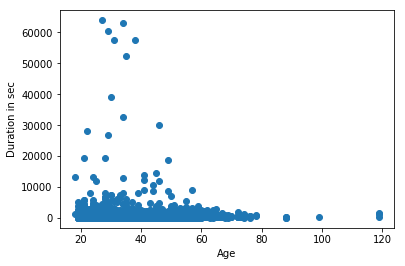

In [98]:
sample2 = df.sample(10000)

plt.scatter(data = sample2, y = 'duration_sec', x = 'age');
plt.ylabel('Duration in sec')
plt.xlabel('Age');

C:\Users\Pst. Job D. Agyo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


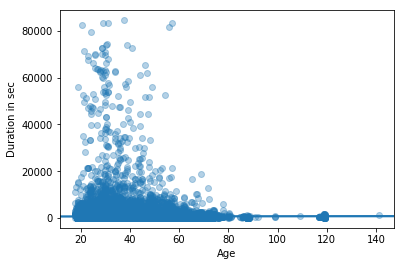

In [99]:
# adding jitter

sb.regplot(data = df, y = 'duration_sec', x = 'age', x_jitter = 0.3,
          scatter_kws = {'alpha':1/3});
plt.ylabel('Duration in sec')
plt.xlabel('Age');

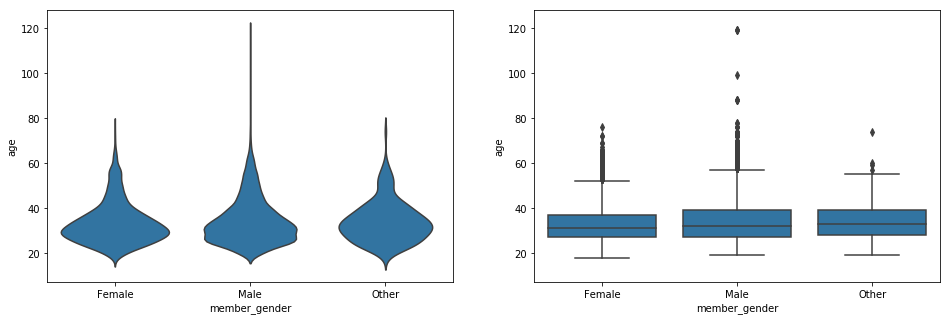

In [102]:
# Age distribution of the genders
plt.figure(figsize = [16, 5])

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = sample2, x = 'member_gender', y = 'age', color = color_,
             inner = None);

plt.subplot(1, 2, 2)
sb.boxplot(data = sample2, x = 'member_gender', y = 'age', color = color_);
plt.ylim(ax1.get_ylim());

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The main relationship I observed in this part is the relationship between the duration of rides and the age of the rider. I wanted to understand if the age of the user affect how long the ride these bikes.

> The older the rider the shorter the ride. Most of the users are clustered around the age of 20 and 60

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> For all genders, there are more subscribers than customers.

## Multivariate Exploration


C:\Users\Pst. Job D. Agyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\Users\Pst. Job D. Agyo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


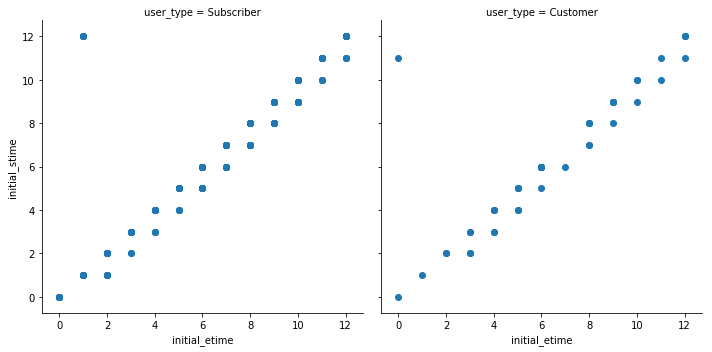

In [101]:
s = np.random.choice(df.shape[0], 500, replace = False)
sample = df.loc[s]


g = sb.FacetGrid(data = sample, col = 'user_type', size = 5,
                margin_titles = True)
g.map(plt.scatter, 'initial_etime', 'initial_stime');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Tried to look at the relationship between the start time of users and their end time, for both subscribers and customers.

> For both categories, there is a potive relationship.
- The earlier users for rides the longer the duration. 


## Conclusions
>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset was for 2019, Feb.

> There are more subcribers compared to customers. Also, there are more men taking rides compared to the other genders. Typically, these riders fall between the ages of 25 and 45. Though there are more elderly men i.e those that fall above 45 years.

> Most of the users prefer to start baking at around 5pm. Though the earlier they go out the longer the durations of these bike rides.

> Only the younger riders tends to have longer durations.